**Fractal Clustering**

Dataset used: Amazon reviews. 

●	Business Task: 

* Sentiment analysis of customer reviews.
* Identifying performing product categories based on user reviews.



In [194]:
# importing necessary libraries
import pandas as pd
import gdown
import json
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline
import helper

In [195]:
#to load file from google drive
url='https://drive.google.com/uc?id=1ZywS6lpGjdy3pQoSU25JvWwbIp-9hv21'


output= "data.json"
gdown.download(url,output,quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ZywS6lpGjdy3pQoSU25JvWwbIp-9hv21
To: /content/data.json
82.0MB [00:00, 87.5MB/s]


'data.json'

In [196]:
#loading the csv file into pandas dataframe


df=pd.read_json("data.json", lines=True)



In [179]:
df

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,code
0,en_0964290,product_en_0740675,reviewer_en_0342986,1,Arrived broken. Manufacturer defect. Two of th...,I'll spend twice the amount of time boxing up ...,en,furniture,10
1,en_0690095,product_en_0440378,reviewer_en_0133349,1,the cabinet dot were all detached from backing...,Not use able,en,home_improvement,13
2,en_0311558,product_en_0399702,reviewer_en_0152034,1,I received my first order of this product and ...,The product is junk.,en,home,12
3,en_0044972,product_en_0444063,reviewer_en_0656967,1,This product is a piece of shit. Do not buy. D...,Fucking waste of money,en,wireless,30
4,en_0784379,product_en_0139353,reviewer_en_0757638,1,went through 3 in one day doesn't fit correct ...,bubble,en,pc,22
...,...,...,...,...,...,...,...,...,...
199995,en_0046316,product_en_0980158,reviewer_en_0629807,5,"Cute slippers, my MIL loved them.",Nice and fit as advertised,en,shoes,25
199996,en_0956024,product_en_0954574,reviewer_en_0459072,5,My 6 year old likes this and keeps him engaged...,good to keep the kids engaged,en,toy,27
199997,en_0589358,product_en_0402982,reviewer_en_0199163,5,Replaced my battery with it. Works like new.,This works,en,wireless,30
199998,en_0970602,product_en_0873374,reviewer_en_0590563,5,"I like them, holding up well.",Well made.,en,industrial_supplies,14


In [197]:
#display all the unique values present in the dataset.
df.product_category.unique()

array(['furniture', 'home_improvement', 'home', 'wireless', 'pc',
       'industrial_supplies', 'kitchen', 'apparel', 'automotive',
       'camera', 'lawn_and_garden', 'watch', 'beauty', 'pet_products',
       'drugstore', 'electronics', 'toy', 'digital_ebook_purchase',
       'book', 'jewelry', 'sports', 'other', 'baby_product',
       'video_games', 'office_product', 'grocery',
       'digital_video_download', 'luggage', 'shoes',
       'musical_instruments', 'personal_care_appliances'], dtype=object)

In [198]:
#converting product category into integer values to form clustering between category and stars.
df.product_category = pd.Categorical(df.product_category)
df['code'] = df.product_category.cat.codes
df.code

In [201]:
#verfifying if the values are converted correctly
df.code.unique()

array([10, 13, 12, 30, 22, 14, 16,  0,  1,  5, 17, 29,  3, 24,  8,  9, 27,
        6,  4, 15, 26, 21,  2, 28, 20, 11,  7, 18, 25, 19, 23], dtype=int8)

In [202]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['code'] = LE.fit_transform(df['product_category'])
df

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,code
0,en_0964290,product_en_0740675,reviewer_en_0342986,1,Arrived broken. Manufacturer defect. Two of th...,I'll spend twice the amount of time boxing up ...,en,furniture,10
1,en_0690095,product_en_0440378,reviewer_en_0133349,1,the cabinet dot were all detached from backing...,Not use able,en,home_improvement,13
2,en_0311558,product_en_0399702,reviewer_en_0152034,1,I received my first order of this product and ...,The product is junk.,en,home,12
3,en_0044972,product_en_0444063,reviewer_en_0656967,1,This product is a piece of shit. Do not buy. D...,Fucking waste of money,en,wireless,30
4,en_0784379,product_en_0139353,reviewer_en_0757638,1,went through 3 in one day doesn't fit correct ...,bubble,en,pc,22
...,...,...,...,...,...,...,...,...,...
199995,en_0046316,product_en_0980158,reviewer_en_0629807,5,"Cute slippers, my MIL loved them.",Nice and fit as advertised,en,shoes,25
199996,en_0956024,product_en_0954574,reviewer_en_0459072,5,My 6 year old likes this and keeps him engaged...,good to keep the kids engaged,en,toy,27
199997,en_0589358,product_en_0402982,reviewer_en_0199163,5,Replaced my battery with it. Works like new.,This works,en,wireless,30
199998,en_0970602,product_en_0873374,reviewer_en_0590563,5,"I like them, holding up well.",Well made.,en,industrial_supplies,14


In [238]:
#dropping all unwanted data
df2=df.drop(['review_title','review_body','review_id',"reviewer_id",'product_id','language','product_category' ],axis=1)
# df2=df.drop(',axis=1	)
# df2=df.drop('reviewer_id',axis=1)
# df2=df.drop('review_body',axis=1)
# df2=df.drop('review_title',axis=1)
df2

,stars,code
0,1,10
1,1,13
2,1,12
3,1,30
4,1,22
...,...,...
199995,5,25
199996,5,27
199997,5,30
199998,5,14


In [239]:
le = preprocessing.LabelEncoder()

labelencoderlist=['code','stars']

In [240]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df2)
    Sum_of_squared_distances.append(km.inertia_)

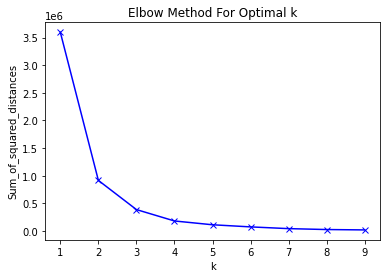

In [267]:
#applying elbow method to calculate the K value
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [268]:
df2 = df2[['stars','code']]
kmeans = KMeans(n_clusters=5)
y = kmeans.fit_predict(df2)
print(df2.head())

   stars  code
0      1    10
1      1    13
2      1    12
3      1    30
4      1    22


In [269]:
kmeans.cluster_centers_

array([[ 1.8677231 ,  2.01659716],
       [ 1.79722621, 22.15771295],
       [ 1.7819161 , 10.49218691],
       [ 1.75487951, 28.37106095],
       [ 1.77859601, 16.26174658]])

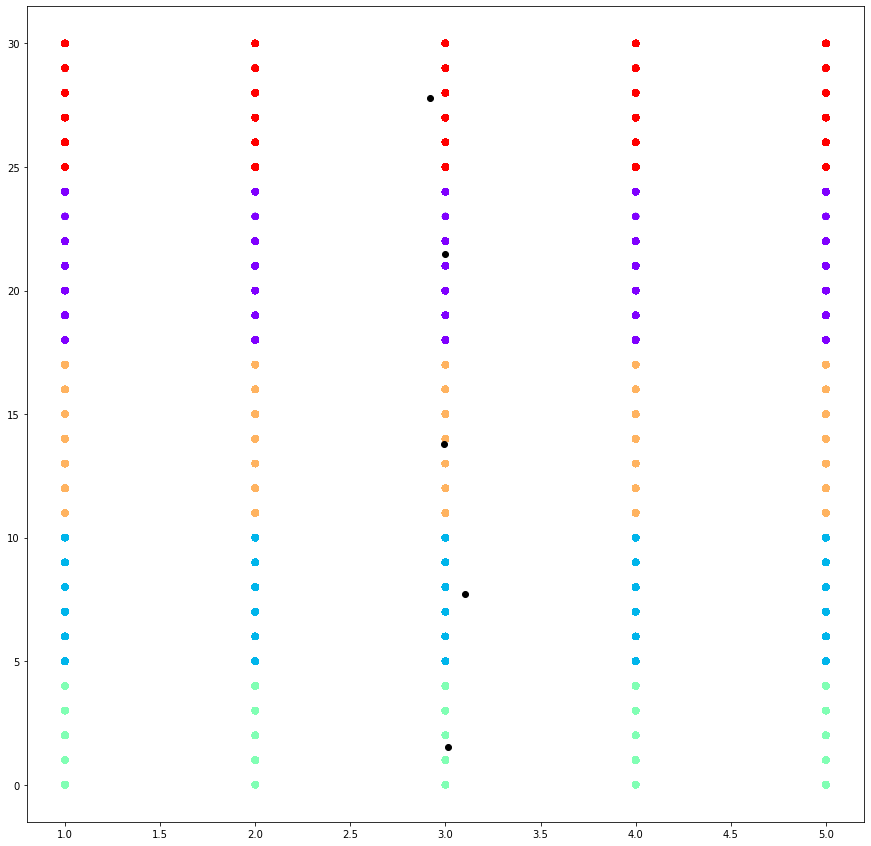

In [244]:
plt.figure(1,figsize=(15,15))
plt.scatter(df2.stars, df2.code, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [270]:
df['stars'].value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         1
2         1
3         1
4         1
         ..
199995    5
199996    5
199997    5
199998    5
199999    5
Name: stars, Length: 200000, dtype: int64>

In [271]:
df3=df2
df3=df3[:100000]
iem_counts = df3["stars"].value_counts(normalize=False)
print(iem_counts)

2    40000
1    40000
3    20000
Name: stars, dtype: int64


As we can see all reviews have same number of reveiws provieded, applying insight to see how review for star=1 is distributed. 

In [251]:
df4=df3.loc[df['stars'] == 1]
df4

,stars,code
0,1,10
1,1,13
2,1,12
3,1,30
4,1,22
...,...,...
39995,1,1
39996,1,30
39997,1,11
39998,1,1


In [252]:
le = preprocessing.LabelEncoder()

labelencoderlist=['code','stars']

In [262]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df4)
    Sum_of_squared_distances.append(km.inertia_)

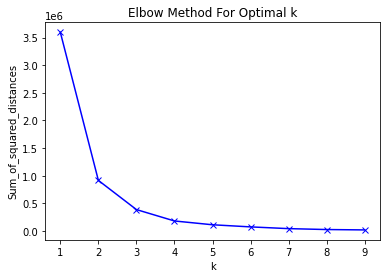

In [263]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [264]:
df4 = df4[['stars','code']]
kmeans = KMeans(n_clusters=1)
y = kmeans.fit_predict(df4)
print(df4.head())

   stars  code
0      1    10
1      1    13
2      1    12
3      1    30
4      1    22


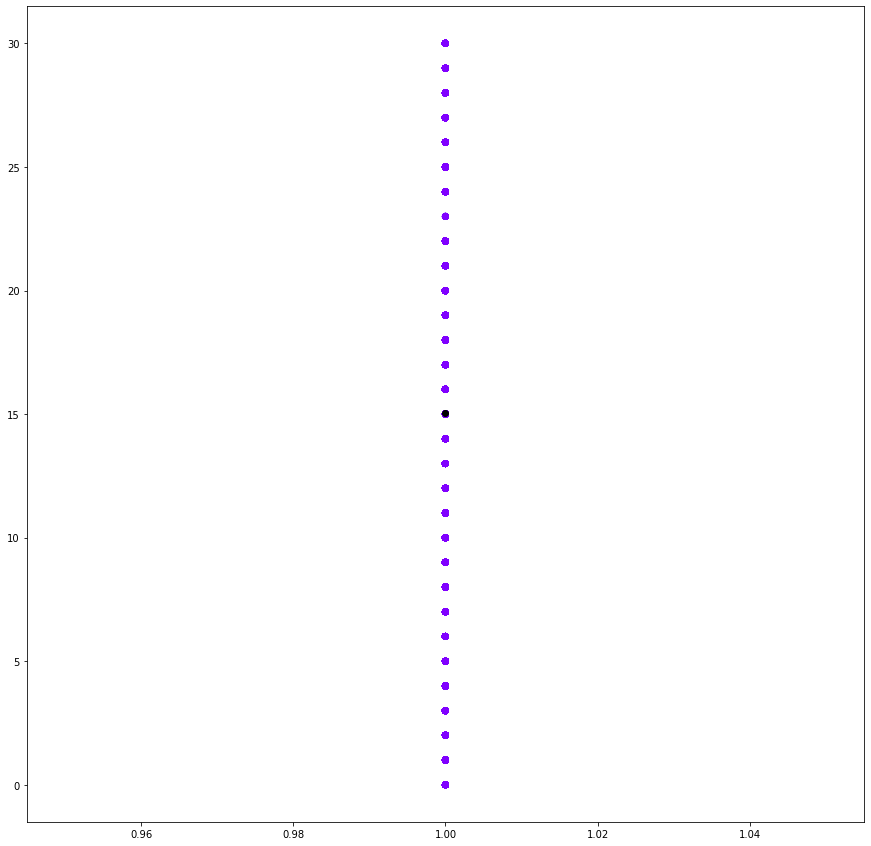

In [266]:
plt.figure(1,figsize=(15,15))
plt.scatter(df4.stars, df4.code, c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

Applying Multi Micro k means Clustering To form micro clustering. I applied clustering with K-means with the product categories converted into numbers with reviews. With the objective to find the cluster with higest reveiw to get an insight on it is is as shown in graph above, where the golden cluster is found for count of stars with value=1 is equally distrubuted among all the 30 categories.